In [1]:
# Z poniższych zbiorów danych wybierz jeden i wykonaj na nim analizę: 
# - określ cel badania  
# - uporządkuj dane  
# - wykonaj wstępne przetwarzanie danych  
# - podziel dane na zbiory treningowy i testowy  
# - zbuduj model  
# - oceń model (miary jakości, krzywa ROC, AUC)  
  
# Zbiory danych: 
# - klasyfikacja: cars (caret), segmentationData (caret), baseball (plyr)  
# - grupowanie: storms (dplr), GermanCredit (caret), diabetes (mclust)  
# - reguły asocjacji: mushroom (arules), Adult (arules)  

library(tidyverse)
options(jupyter.rich_display = FALSE,
        repr.plot.width = 15,
        repr.plot.height = 8,
        warn = -1)

library(caret)
data(cars)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# 0. Cel badania  
- wizualna eksploracja zbioru danych (poćwiczenie ggplota)  
- chciałbym spróbowac zrobic tzw "Sankey Diagram", zobaczymy czy jak pokategoryzuje zmienne to cos z tego wyjdzie
- tbd

# 1. Inspekcja

In [2]:
dim(cars)

[1] 804  18

In [3]:
names(cars)

 [1] "Price"       "Mileage"     "Cylinder"    "Doors"       "Cruise"     
 [6] "Sound"       "Leather"     "Buick"       "Cadillac"    "Chevy"      
[11] "Pontiac"     "Saab"        "Saturn"      "convertible" "coupe"      
[16] "hatchback"   "sedan"       "wagon"      

In [4]:
glimpse(cars)

Rows: 804
Columns: 18
$ Price       <dbl> 22661.05, 21725.01, 29142.71, 30731.94, 33358.77, 30315.17…
$ Mileage     <int> 20105, 13457, 31655, 22479, 17590, 23635, 17381, 27558, 25…
$ Cylinder    <int> 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Doors       <int> 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Cruise      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Sound       <int> 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0…
$ Leather     <int> 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1…
$ Buick       <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Cadillac    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Chevy       <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Pontiac     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Saab        <int> 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Saturn      <int

In [5]:
sum(is.na(cars))

[1] 0

wiekszosc kolumn wyglada na typ `bool`, sprawdzam unikalne wartosci

In [6]:
for (column in names(cars)) {
    # dwie pierwszwe kolumny maja numeric, wiec skip
    if (column %in% c("Price", "Mileage")) next 
    print(as.vector(unique(cars[column])))
}

$Cylinder
[1] 6 4 8

$Doors
[1] 4 2

$Cruise
[1] 1 0

$Sound
[1] 0 1

$Leather
[1] 0 1

$Buick
[1] 1 0

$Cadillac
[1] 0 1

$Chevy
[1] 0 1

$Pontiac
[1] 0 1

$Saab
[1] 0 1

$Saturn
[1] 0 1

$convertible
[1] 0 1

$coupe
[1] 0 1

$hatchback
[1] 0 1

$sedan
[1] 1 0

$wagon
[1] 0 1



# 2. Zmiana zmiennych binarnych z typu `int` na `logical`

In [7]:
cars_with_bool_vars <- cars %>%
    mutate(
        Cylinder = as.factor(Cylinder),
        Doors = as.factor(Doors),
        Cruise = as.logical(Cruise),
        Sound = as.logical(Sound),
        Leather = as.logical(Leather),
        Buick = as.logical(Buick),
        Cadillac = as.logical(Cadillac),
        Chevy = as.logical(Chevy),
        Pontiac = as.logical(Pontiac),
        Saab = as.logical(Saab),
        Saturn = as.logical(Saturn),
        convertible = as.logical(convertible),
        coupe = as.logical(coupe),
        hatchback = as.logical(hatchback),
        sedan = as.logical(sedan),
        wagon = as.logical(wagon) 
    )

In [8]:
glimpse(cars_with_bool_vars)

Rows: 804
Columns: 18
$ Price       <dbl> 22661.05, 21725.01, 29142.71, 30731.94, 33358.77, 30315.17…
$ Mileage     <int> 20105, 13457, 31655, 22479, 17590, 23635, 17381, 27558, 25…
$ Cylinder    <fct> 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Doors       <fct> 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Cruise      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE…
$ Sound       <lgl> FALSE, TRUE, TRUE, FALSE, TRUE, FALSE, TRUE, FALSE, FALSE,…
$ Leather     <lgl> FALSE, FALSE, TRUE, FALSE, TRUE, FALSE, TRUE, TRUE, FALSE,…
$ Buick       <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ Cadillac    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA…
$ Chevy       <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FAL…
$ Pontiac     <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FA…
$ Saab        <lgl> FALSE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ Saturn      <lgl

odpowiedz z ChatuGPT, bo na necie nie moge znalezc w takim tempie odpowiedzi co oznaczaja te zmienne, a na autach się zupelnie nie znam

1. **Price**: The price of the car (dependent variable for regression problems, typically in dollars).
2. **Mileage**: The number of miles the car has been driven (independent variable, typically in thousands of miles).
3. **Cylinder**: The number of engine cylinders (e.g., 4, 6, 8), which influences engine power and fuel efficiency.
4. **Doors**: The number of doors on the car (e.g., 2 for a coupe, 4 for a sedan).
5. **Cruise**: Indicates whether the car has cruise control (binary: 1 = Yes, 0 = No).
6. **Sound**: Indicates whether the car has a premium sound system (binary: 1 = Yes, 0 = No).
7. **Leather**: Indicates whether the car has leather seats (binary: 1 = Yes, 0 = No).
8. **Buick**: Indicates if the car is a Buick (binary: 1 = Yes, 0 = No).
9. **Cadillac**: Indicates if the car is a Cadillac (binary: 1 = Yes, 0 = No).
10. **Chevy**: Indicates if the car is a Chevrolet (binary: 1 = Yes, 0 = No).
11. **Pontiac**: Indicates if the car is a Pontiac (binary: 1 = Yes, 0 = No).
12. **Saab**: Indicates if the car is a Saab (binary: 1 = Yes, 0 = No).
13. **Saturn**: Indicates if the car is a Saturn (binary: 1 = Yes, 0 = No).
14. **convertible**: Indicates if the car is a convertible (binary: 1 = Yes, 0 = No).
15. **coupe**: Indicates if the car is a coupe (binary: 1 = Yes, 0 = No).
16. **hatchback**: Indicates if the car is a hatchback (binary: 1 = Yes, 0 = No).
17. **sedan**: Indicates if the car is a sedan (binary: 1 = Yes, 0 = No).
18. **wagon**: Indicates if the car is a station wagon (binary: 1 = Yes, 0 = No).

# 3. Wizualna eksploracja

zanim cokolwiek wyswietle to chce zmienic ten dataset z one-hot-encoded wersji na wersje z kategoriami

sprawdzam najpierw, czy grupy zmiennych o ktorych mam podejrzenie, ze sie wykluczaja faktycznie to robia, czyli ze moge je zmergować do wspolnych kolumn

In [9]:
marki <- cars[8:13]
marki_rowsum <- rowSums(marki)
# jesli wynikiem tej funkcji jest wektor samych jedynek, zmienne sie wykluczaja

names(marki) # nazwy mark aut
head(marki_rowsum) # jak wygladaja sumy rzedow
sum(marki_rowsum) # suma sum wierszy
sum(marki_rowsum) == nrow(cars) # czy suma sum wierszy rowna liczbie wierszy
all(marki_rowsum == 1) # czy w kazdym wierszu jest jedna jedynka

[1] "Buick"    "Cadillac" "Chevy"    "Pontiac"  "Saab"     "Saturn"  

[1] 1 1 1 1 1 1

[1] 804

[1] TRUE

[1] TRUE

marki sie wykluczaja

In [10]:
typy <- cars[14:18]
typy_rowsum <- rowSums(typy) 
# jesli wynikiem tej funkcji jest wektor samych jedynek, zmienne sie wykluczaja

names(typy) # nazwy typow aut
head(typy_rowsum) # jak wygladaja sumy rzedow
sum(typy_rowsum) # suma sum wierszy
sum(typy_rowsum) == nrow(cars) # czy suma sum wierszy rowna liczbie wierszy
all(typy_rowsum == 1) # czy w kazdym wierszu jest jedna jedynka

[1] "convertible" "coupe"       "hatchback"   "sedan"       "wagon"      

[1] 1 1 1 1 1 1

[1] 804

[1] TRUE

[1] TRUE

typy aut tez sie wykluczaja

In [11]:
# pewnie da sie to zrobic madrzej, ja natomiast zrobilem tak
# jak bym to zrobic w excelu, tzn zagniezdzam w sobie ifelse
df <- cars_with_bool_vars  %>%
    mutate(
        Brand = as.factor(ifelse(Buick == TRUE, "Buick",
                ifelse(Cadillac == TRUE, "Cadillac",
                ifelse(Chevy == TRUE, "Chevy",
                ifelse(Pontiac == TRUE, "Pontiac",
                ifelse(Saab == TRUE, "Saab", "Saturn")))))),
        Type =  as.factor(ifelse(convertible == TRUE, "convertible",
                ifelse(coupe == TRUE, "coupe",
                ifelse(hatchback == TRUE, "hatchback",
                ifelse(sedan == TRUE, "sedan", "wagon")))))
    )  %>%
    select(Price, Mileage, Cylinder, Doors, Cruise, Sound, Leather, Brand, Type)

In [12]:
glimpse(df)

Rows: 804
Columns: 9
$ Price    <dbl> 22661.05, 21725.01, 29142.71, 30731.94, 33358.77, 30315.17, 3…
$ Mileage  <int> 20105, 13457, 31655, 22479, 17590, 23635, 17381, 27558, 25049…
$ Cylinder <fct> 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Doors    <fct> 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ Cruise   <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ Sound    <lgl> FALSE, TRUE, TRUE, FALSE, TRUE, FALSE, TRUE, FALSE, FALSE, FA…
$ Leather  <lgl> FALSE, FALSE, TRUE, FALSE, TRUE, FALSE, TRUE, TRUE, FALSE, TR…
$ Brand    <fct> Buick, Chevy, Saab, Saab, Saab, Saab, Saab, Saab, Saab, Saab,…
$ Type     <fct> sedan, coupe, convertible, convertible, convertible, converti…


ciekawe jest to ze zwykle podczas jakiegos ML robimy na odwrot, tzn kategorie rozkladamy na kolumny binarne, a ja zeby zrobic wygodnie wykresiki zrobilem pod wlos haha;)

## 3.1 Rozkłady zmiennych

### Zmienne numeryczne

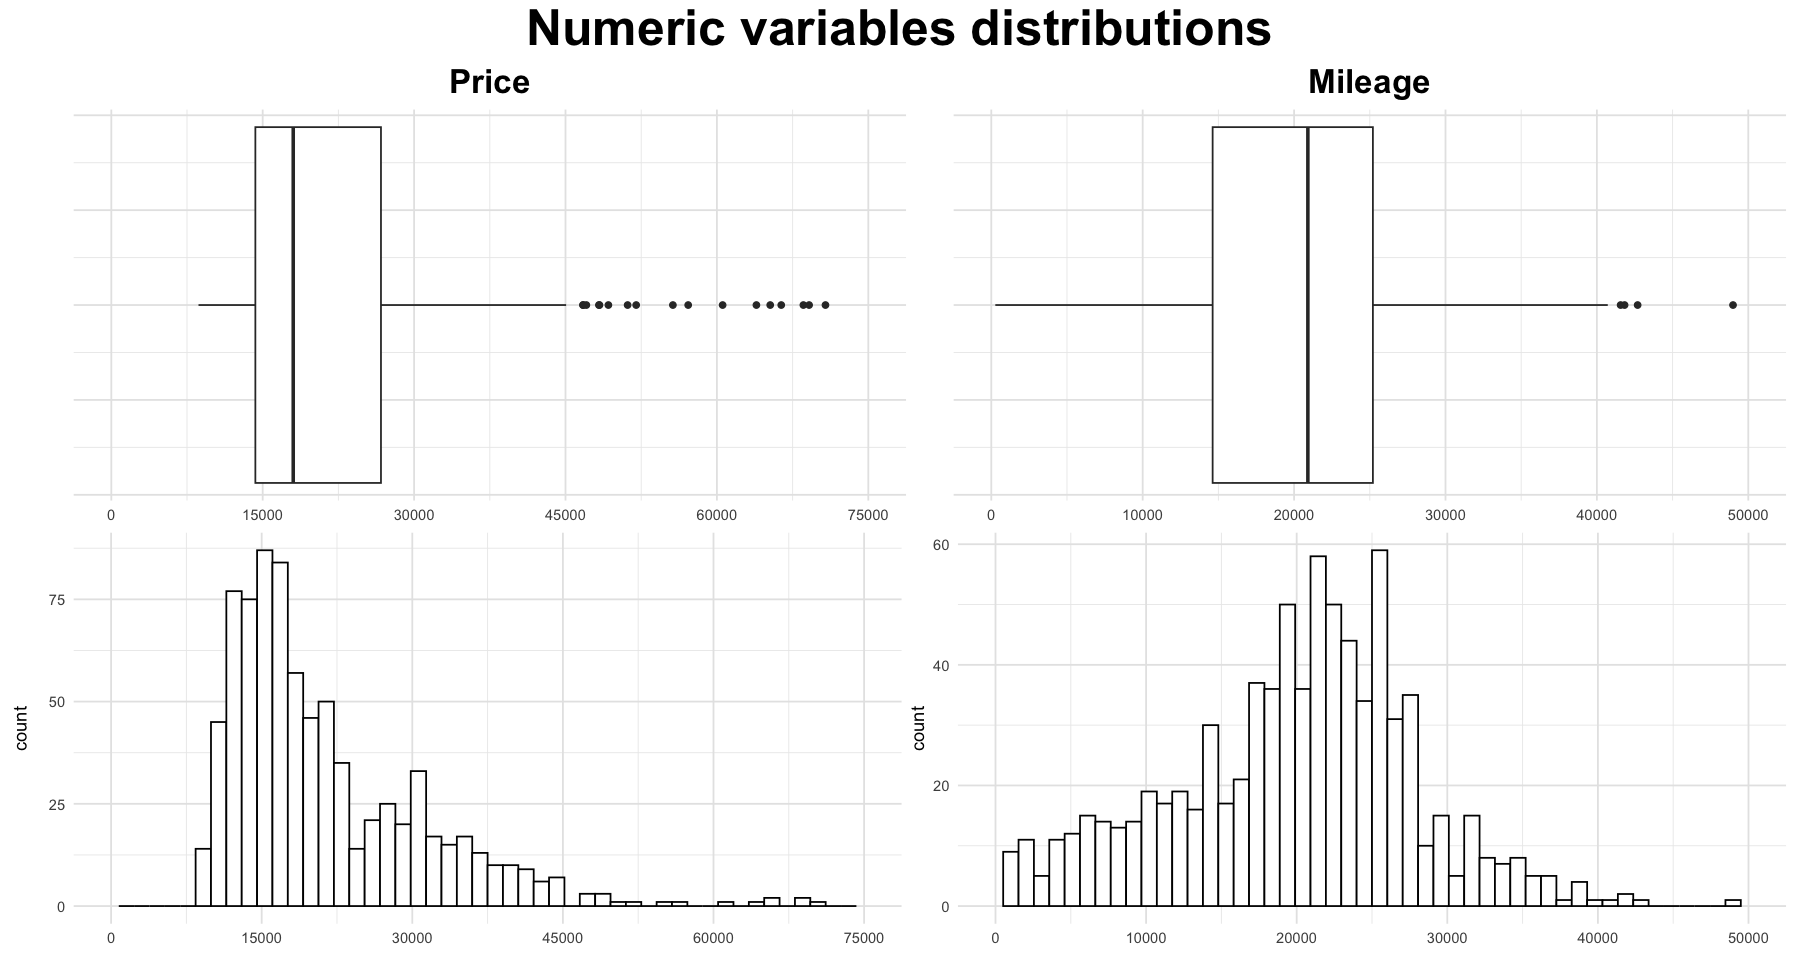

In [13]:
library(patchwork)
my_theme <- theme_minimal() +
  theme(
    panel.grid.major = element_line(color = "grey90"),
    plot.margin = unit(c(1,1,1,1), "mm"),
    panel.spacing = unit(0, "mm")
  )

box1 <- ggplot(df) +
  aes(x = Price) +
  geom_boxplot() +
  my_theme +
  scale_x_continuous(limits = c(0, 75000), breaks = seq(0, 75000, by = 15000)) + 
  ggtitle("Price") +
  theme(axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(),
        plot.title = element_text(size = 20, face = "bold", hjust = .5))

hist1 <- ggplot(df) +
  aes(x = Price) +
  geom_histogram(bins = 50, fill = "white", color = "black") +
  my_theme +
  scale_x_continuous(limits = c(0, 75000), breaks = seq(0, 75000, by = 15000)) + 
  theme(axis.title.x = element_blank())

box2 <- ggplot(df) +
  aes(x = Mileage) +
  geom_boxplot() +
  my_theme +
  scale_x_continuous(limits = c(0, 50000), breaks = seq(0, 50000, by = 10000)) + 
  ggtitle("Mileage") +
  theme(axis.text.y = element_text(color = "white"),
        axis.title.x = element_blank(), 
        plot.title = element_text(size = 20, face = "bold", hjust = .5))

hist2 <- ggplot(df) +
  aes(x = Mileage) +
  geom_histogram(bins = 50, fill = "white", color = "black") +
  my_theme +
  scale_x_continuous(limits = c(0, 50000), breaks = seq(0, 50000, by = 10000)) + 
  theme(axis.title.x = element_blank())


(box1 | box2) / 
(hist1 | hist2) +
  plot_annotation(
    title = "Numeric variables distributions",
    theme = theme(
      plot.title = element_text(size = 30, face = "bold", hjust = .5, margin = margin(b = 5))
    )
  )

### Zmienne kategorialne

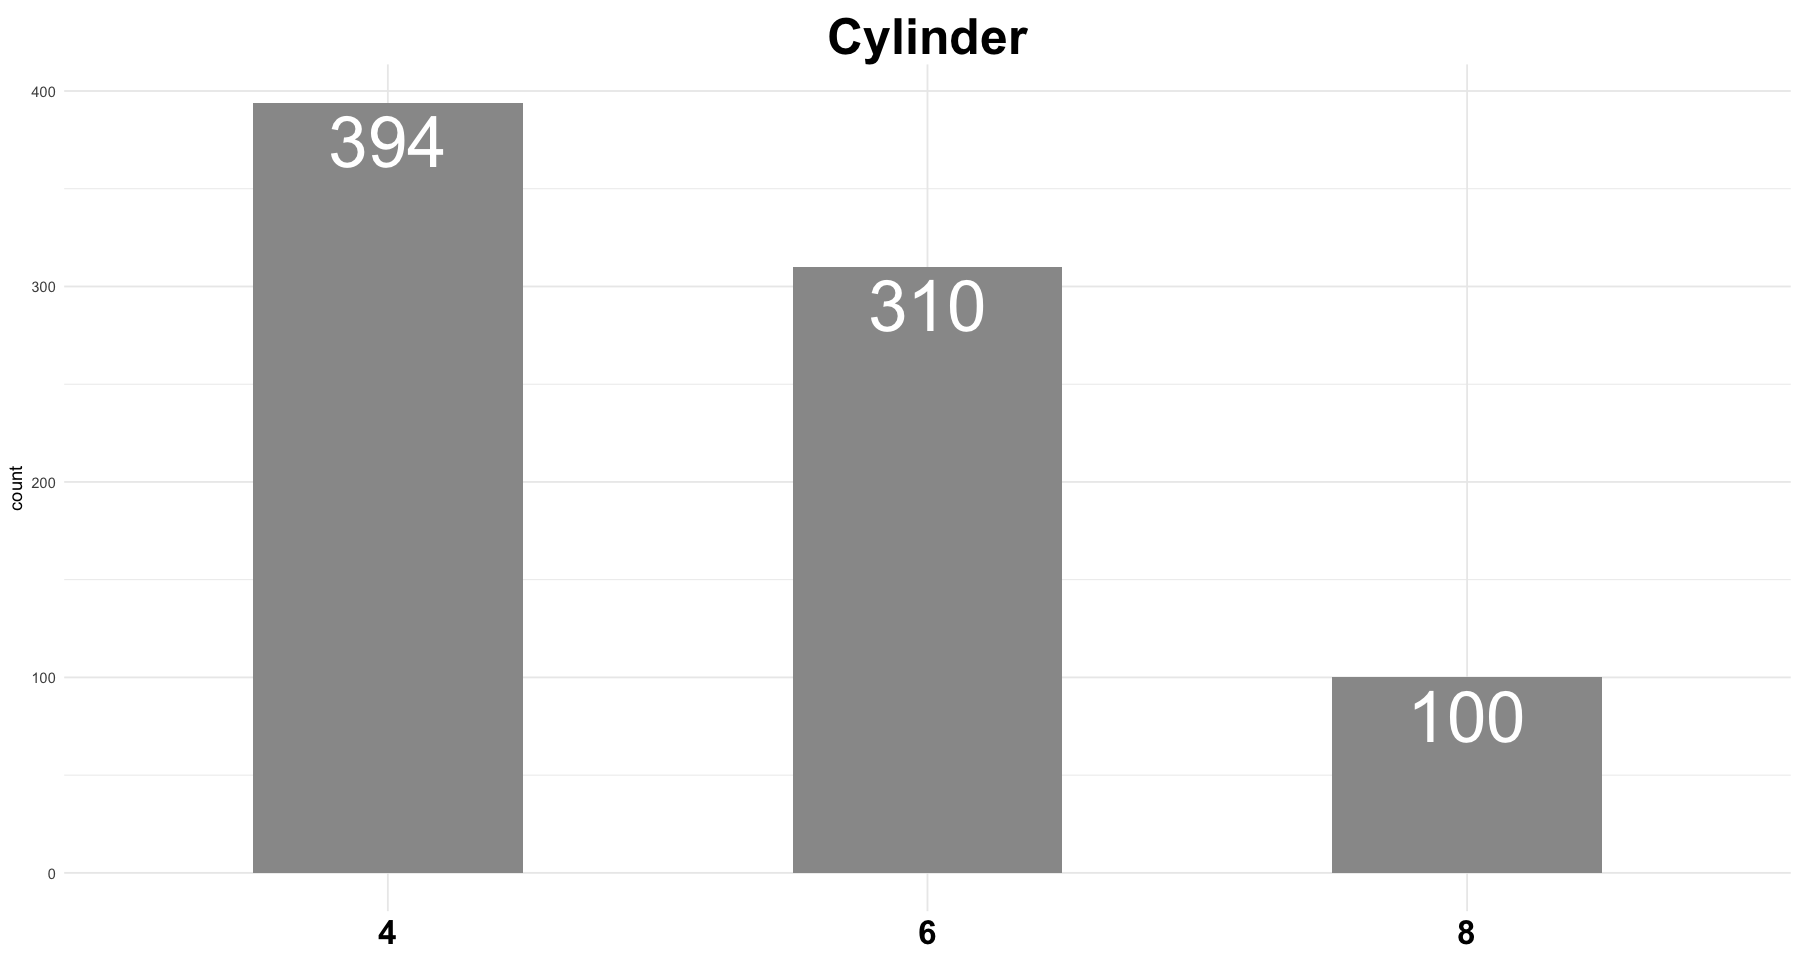

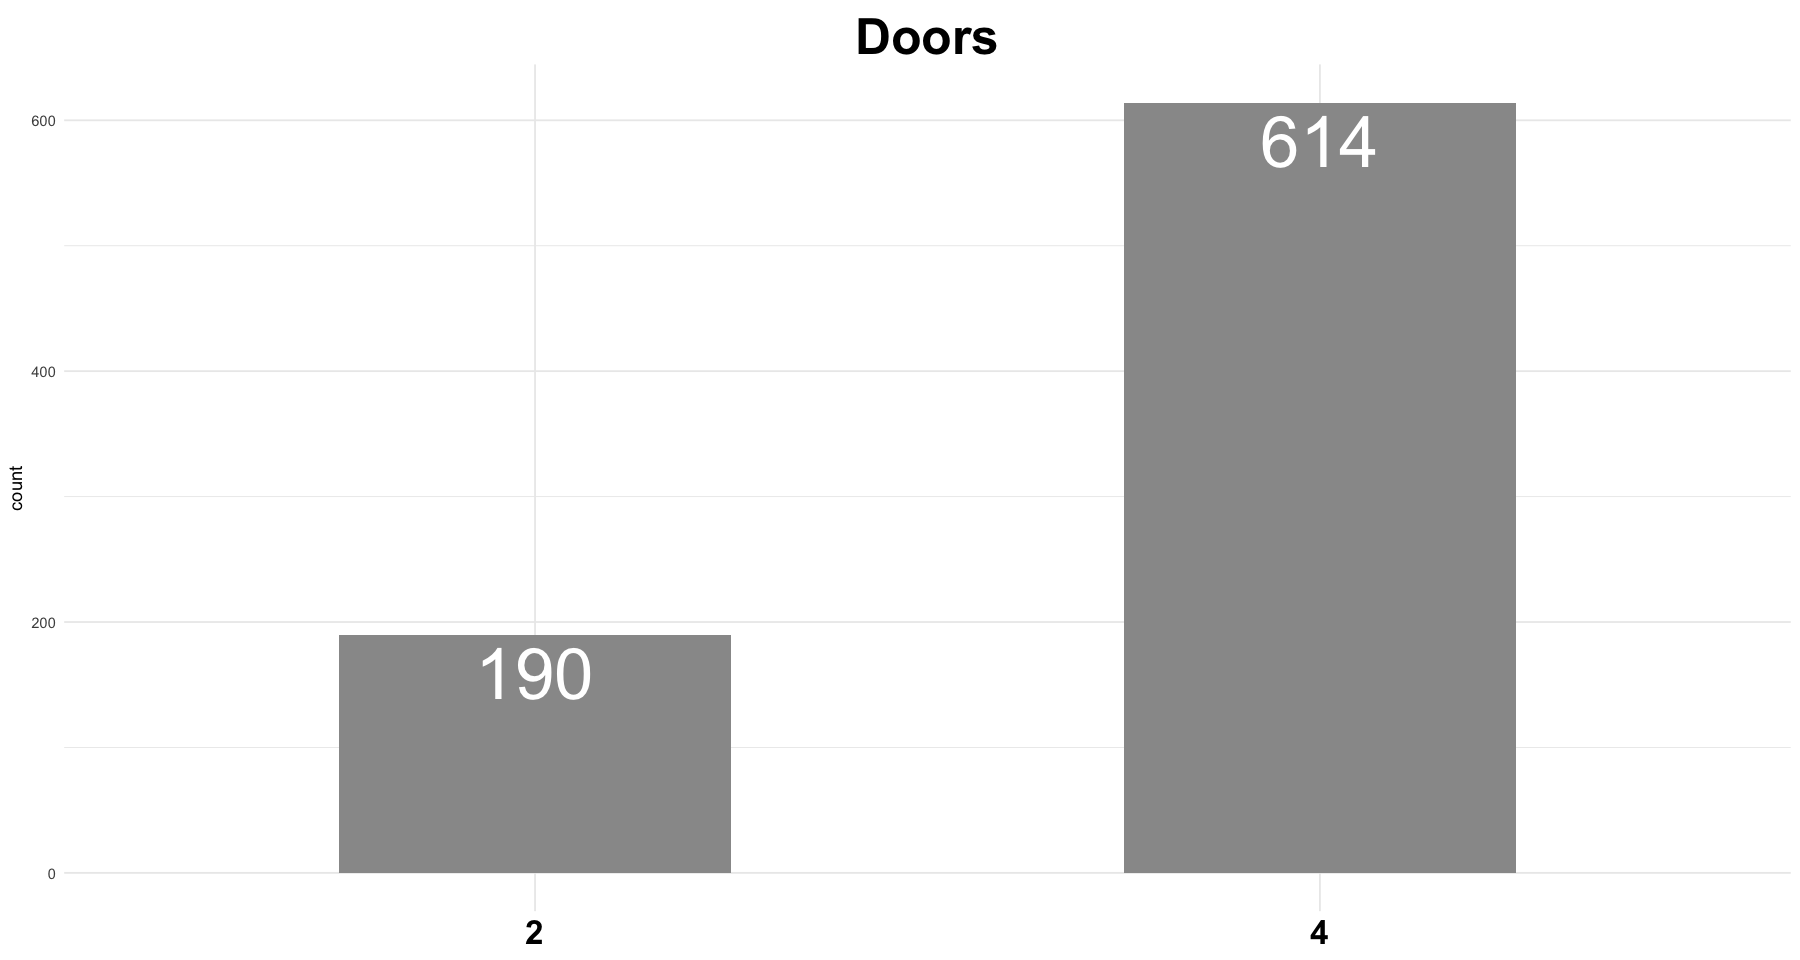

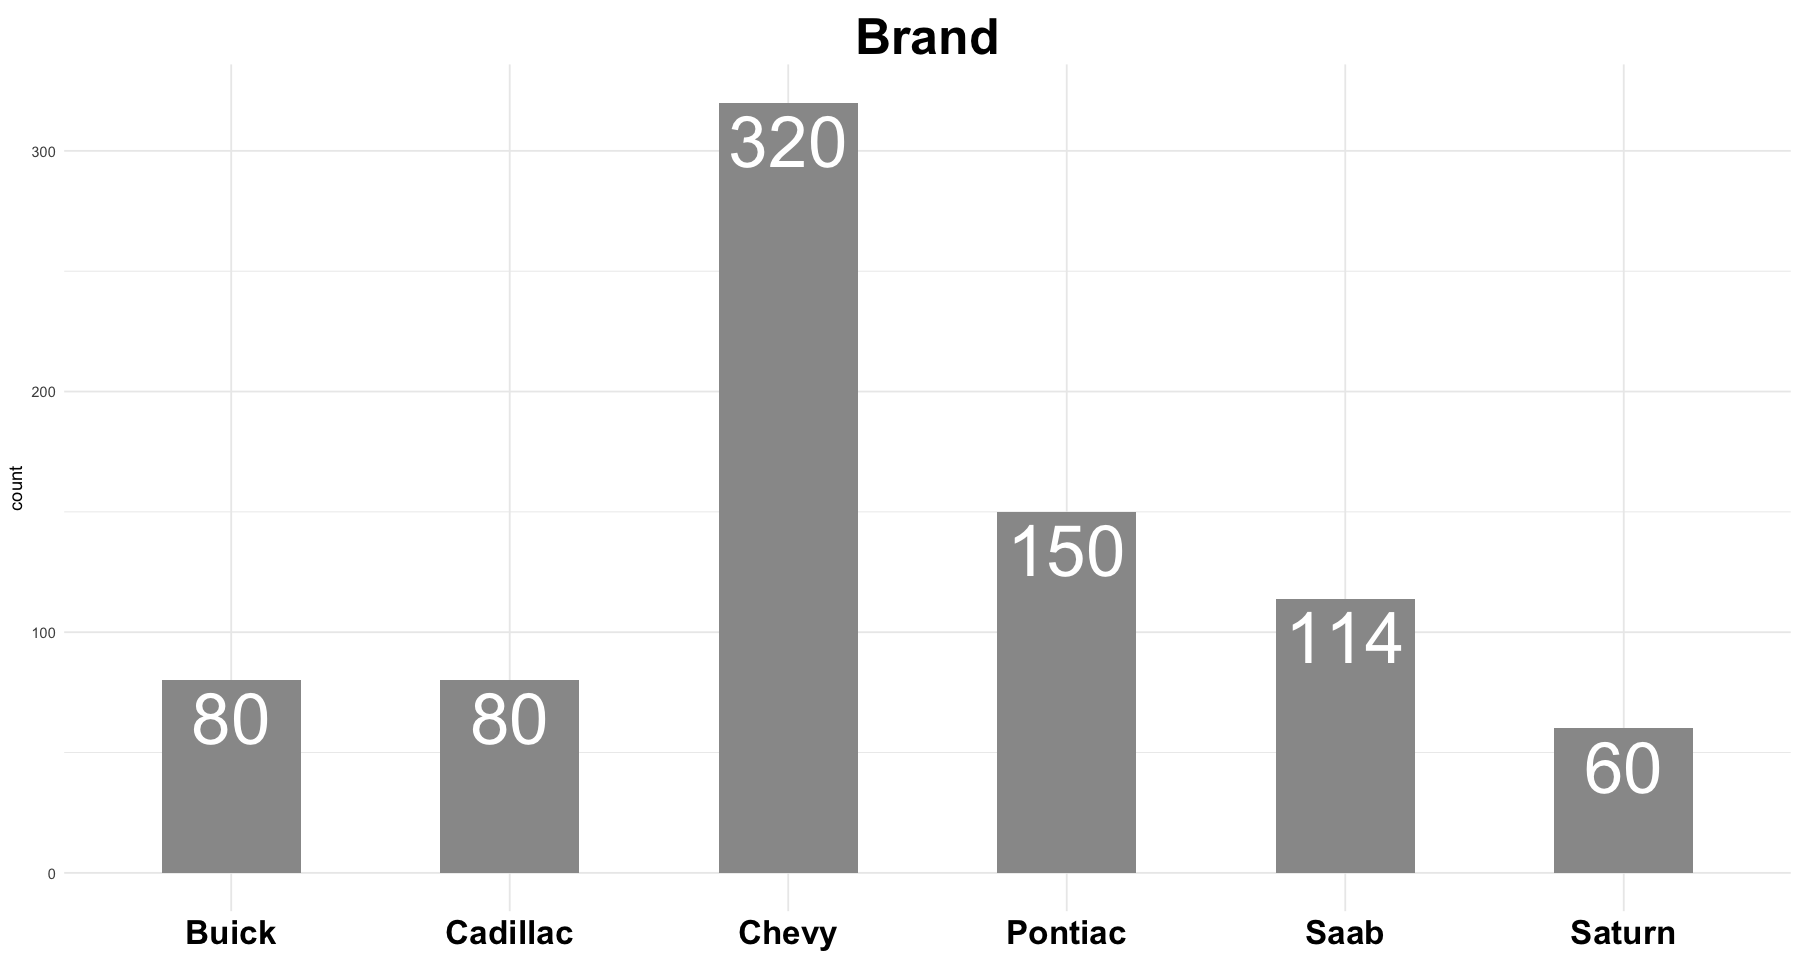

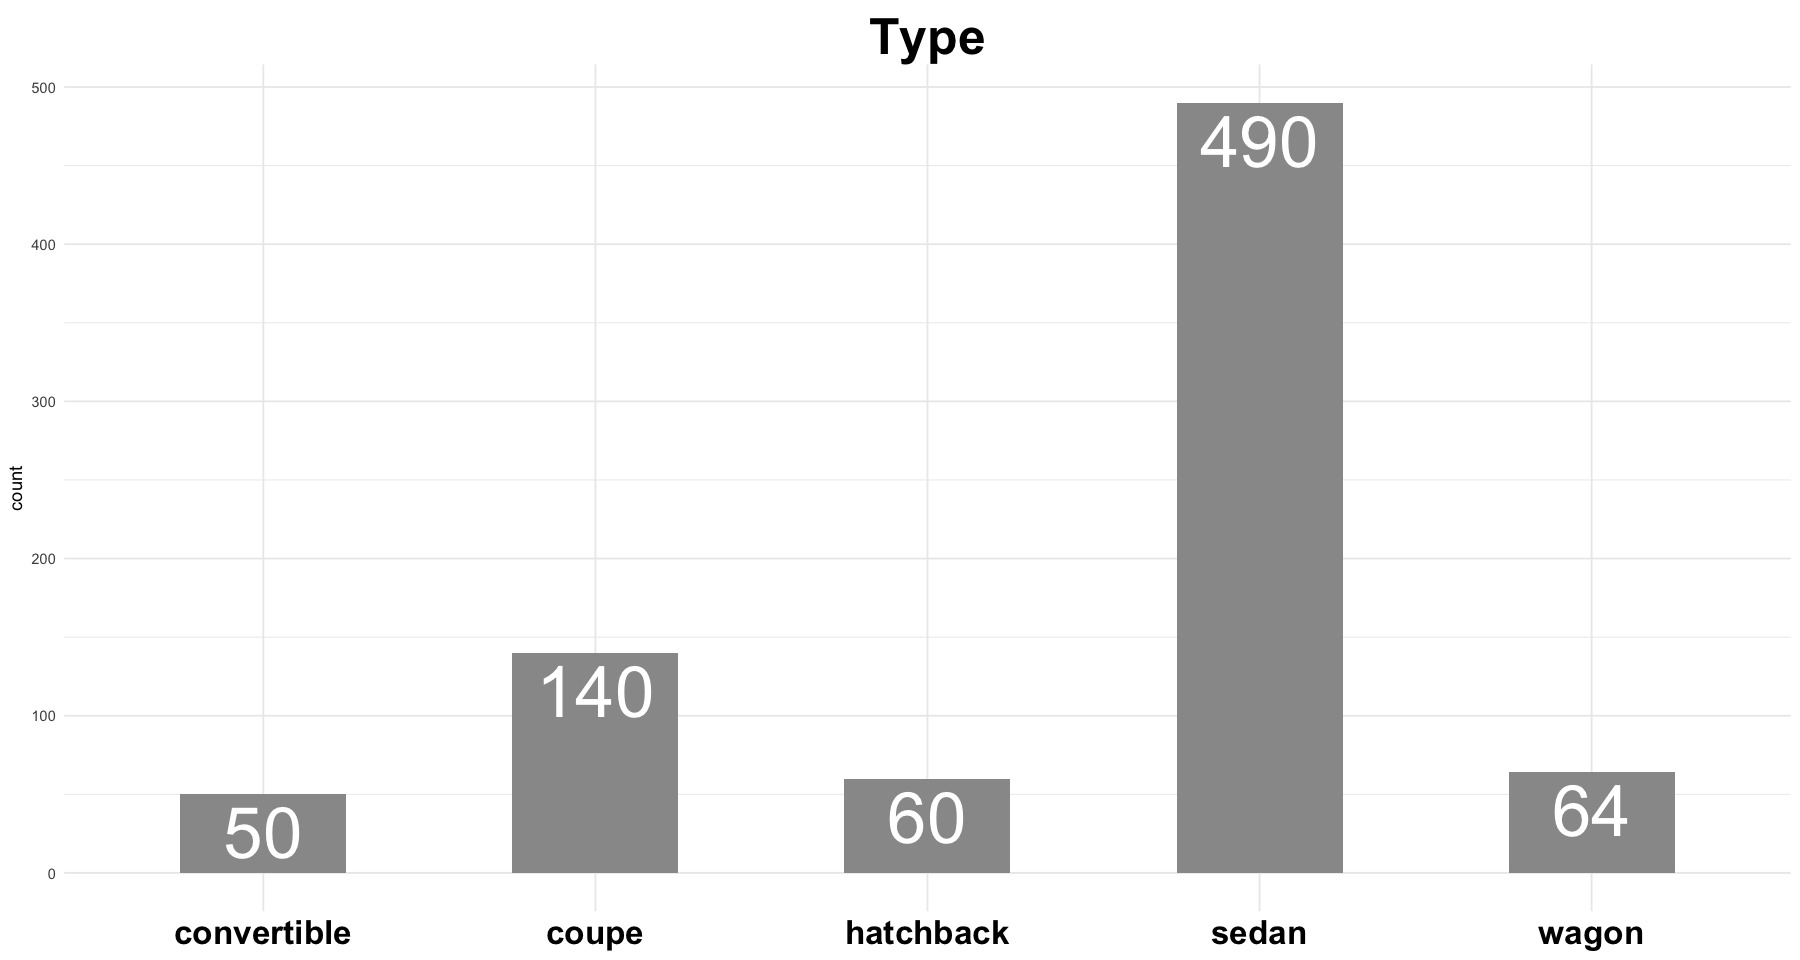

In [90]:
for (col in c("Cylinder", "Doors", "Brand", "Type")){
plot <- ggplot(df) + 
    aes(x = df[[col]]) + 
    geom_bar(width = .5, fill = rgb(.6, .6, .6)) + 
    geom_text(stat = "count", aes(label = ..count..), vjust = 1.25, size = 15, color = "white") +
    theme_minimal() + 
    ggtitle(col) +
    theme(
        axis.text.x = element_text(size = 20, face = "bold", color = "black"),
        axis.title.x = element_blank(),
        plot.title = element_text(size = 30, face = "bold", hjust = .5, margin = margin(t = 5)),
    )
print(plot)
}

### Zmienne binarne

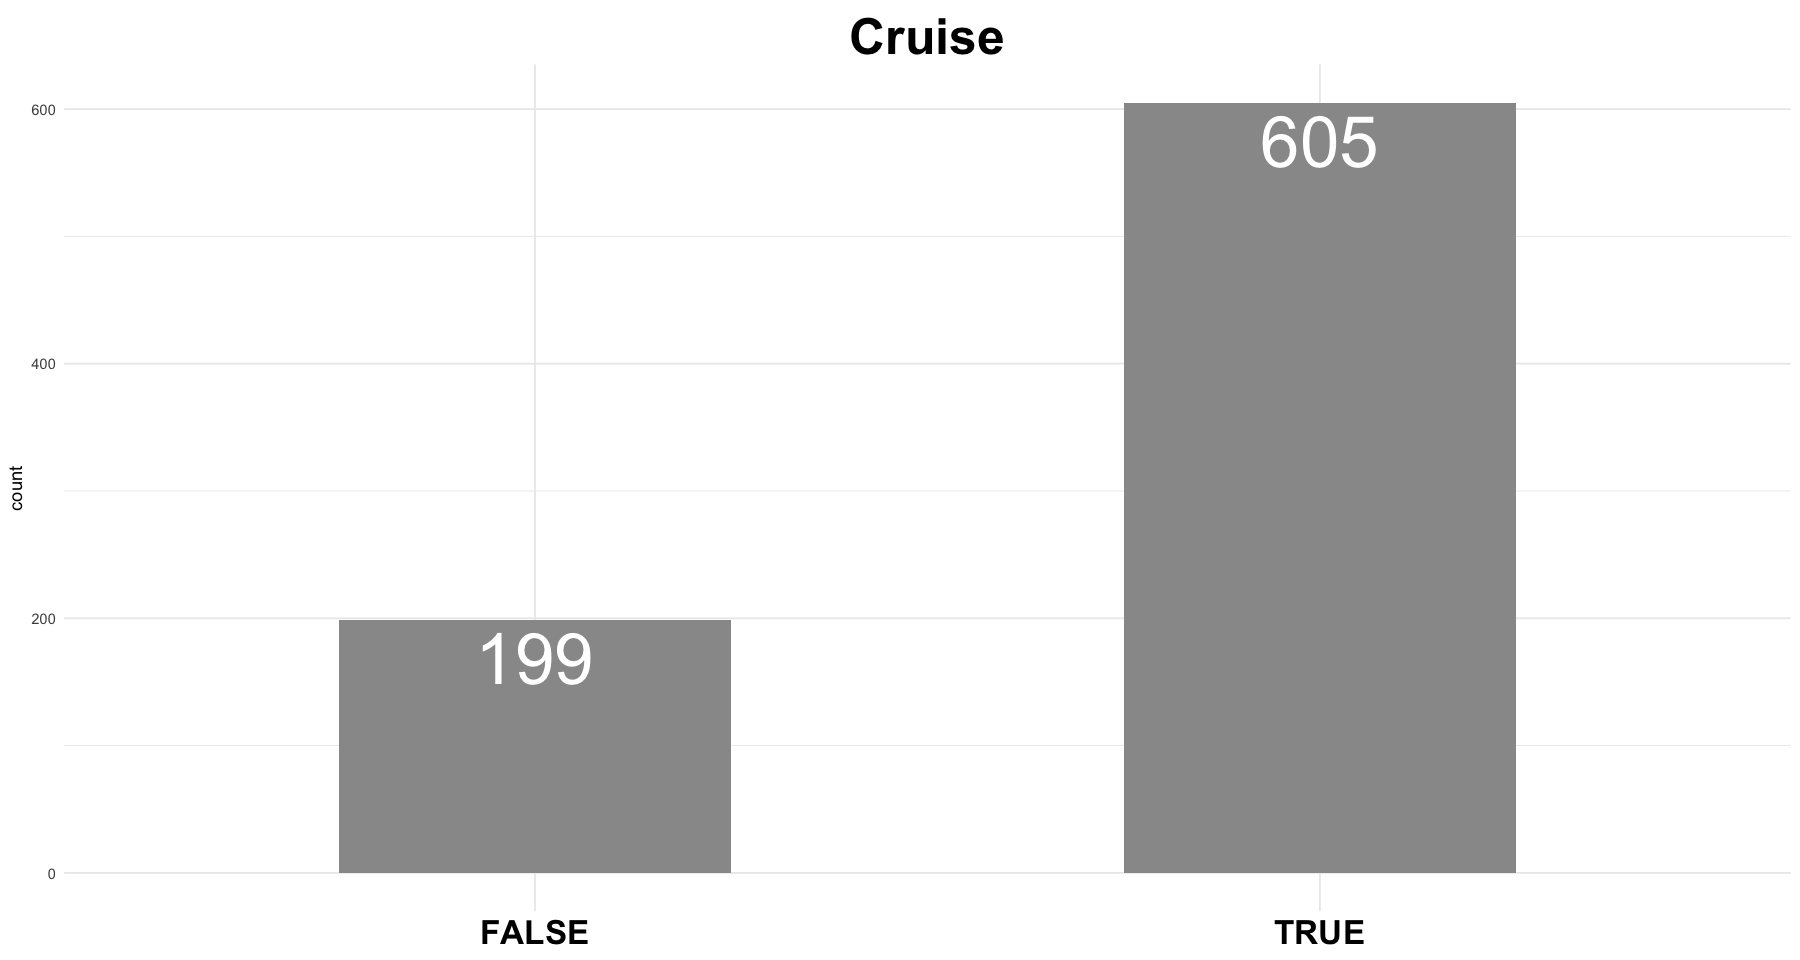

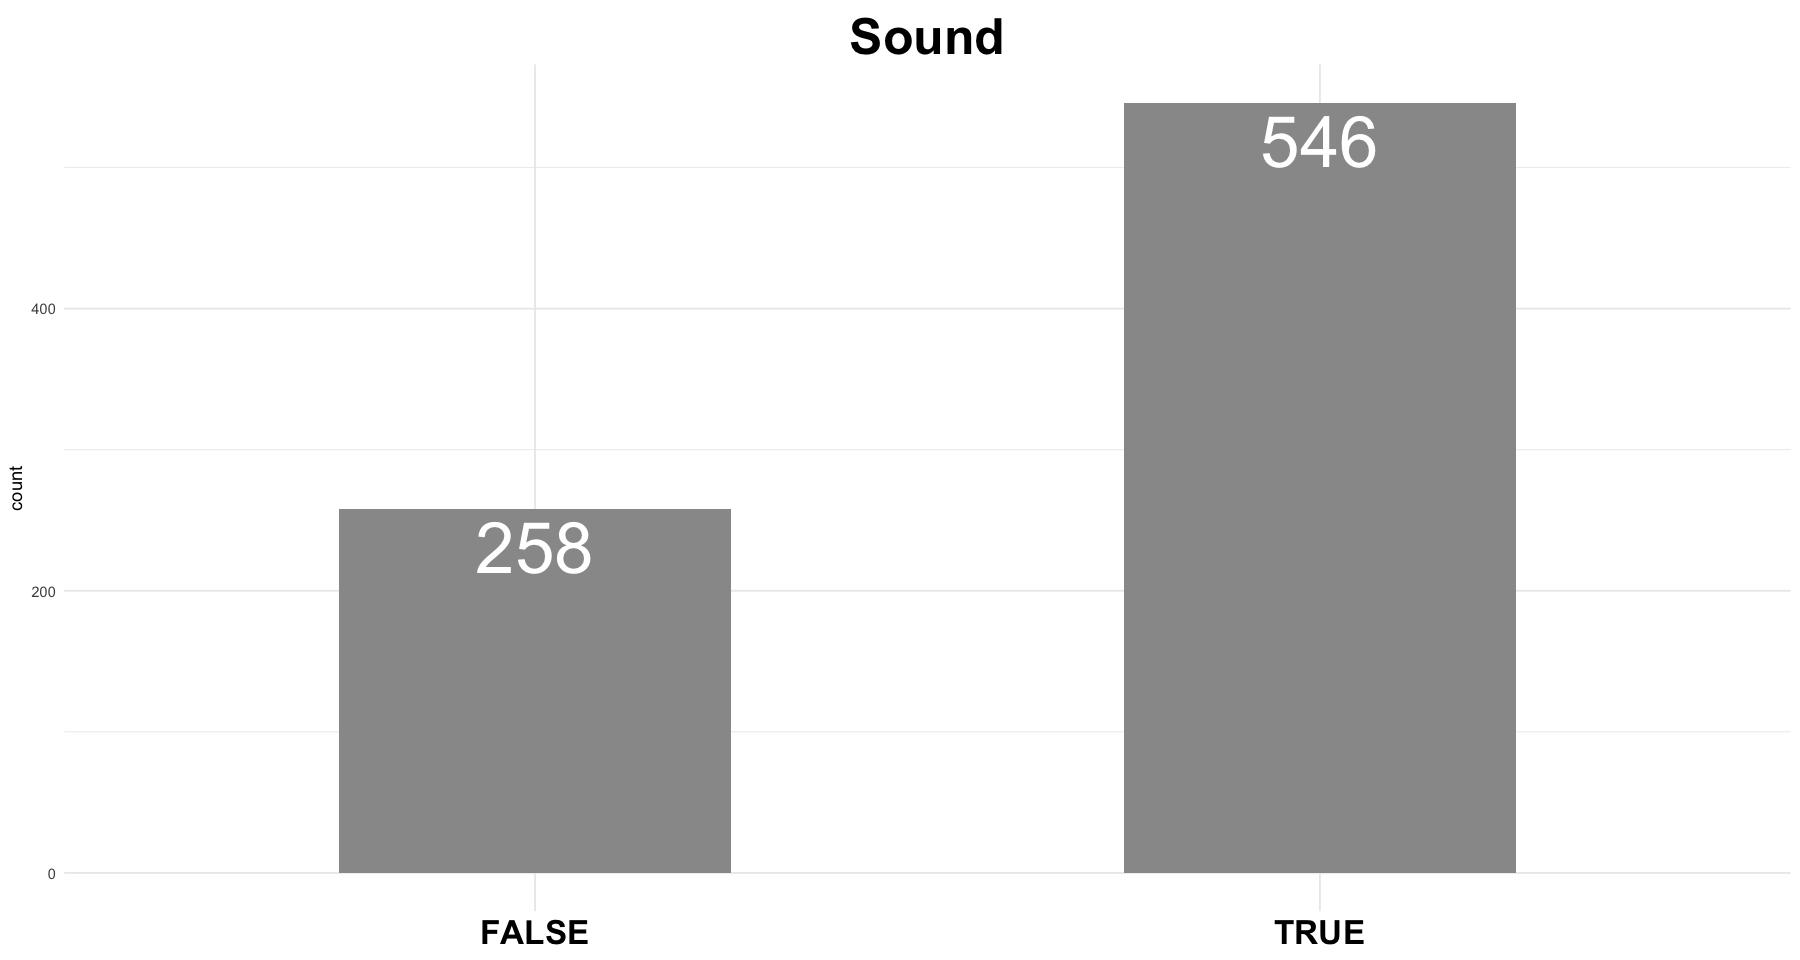

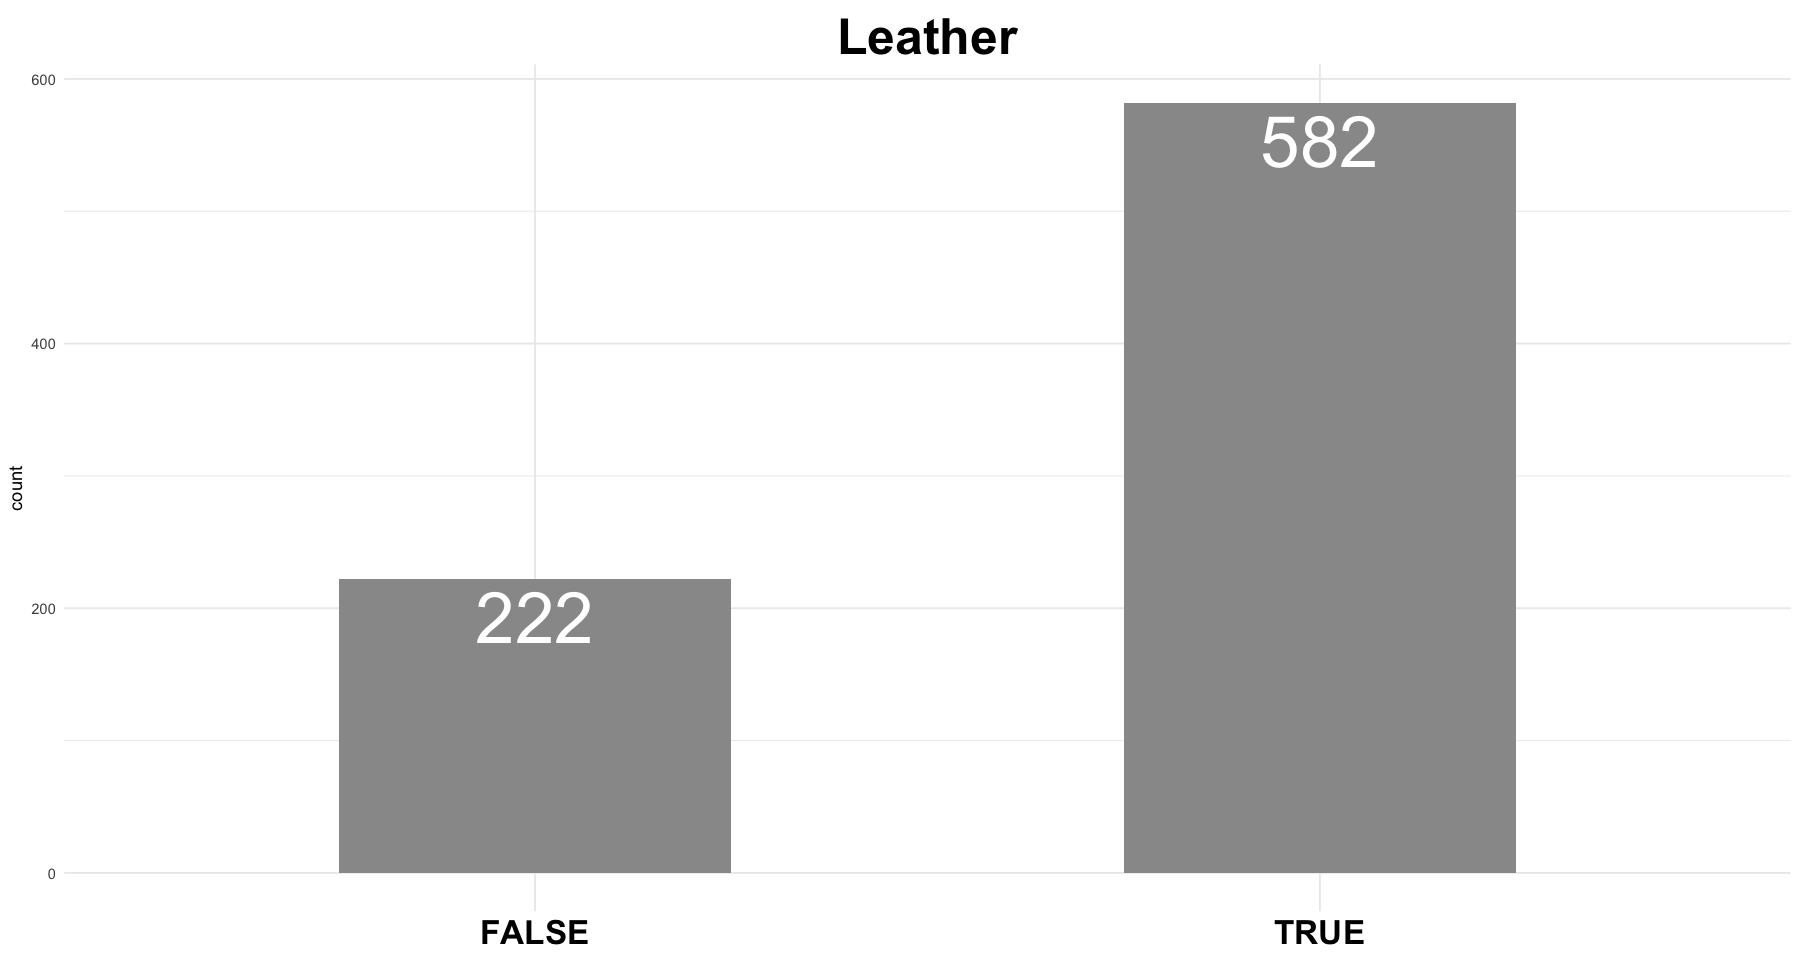

In [91]:
for (col in c("Cruise", "Sound", "Leather")){
plot <- ggplot(df) + 
    aes(x = df[[col]]) + 
    geom_bar(width = .5, fill = rgb(.6, .6, .6)) + 
    geom_text(stat = "count", aes(label = ..count..), vjust = 1.25, size = 15, color = "white") +
    theme_minimal() + 
    ggtitle(col) +
    theme(
        axis.text.x = element_text(size = 20, face = "bold", color = "black"),
        axis.title.x = element_blank(),
        plot.title = element_text(size = 30, face = "bold", hjust = .5, margin = margin(t = 5)),
    )
print(plot)
}

In [ ]:
P